## Leitura de Dados


In [75]:
import pandas as pd

In [76]:
data = pd.read_csv("Mall_Customers.csv")

## Análise Exploratória

In [77]:
data = data.dropna()
print ("Total de daddos: ", len(data))
missing_data = data.isna().any()
print (missing_data)

Total de daddos:  200
CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool


In [78]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Vizualização


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt


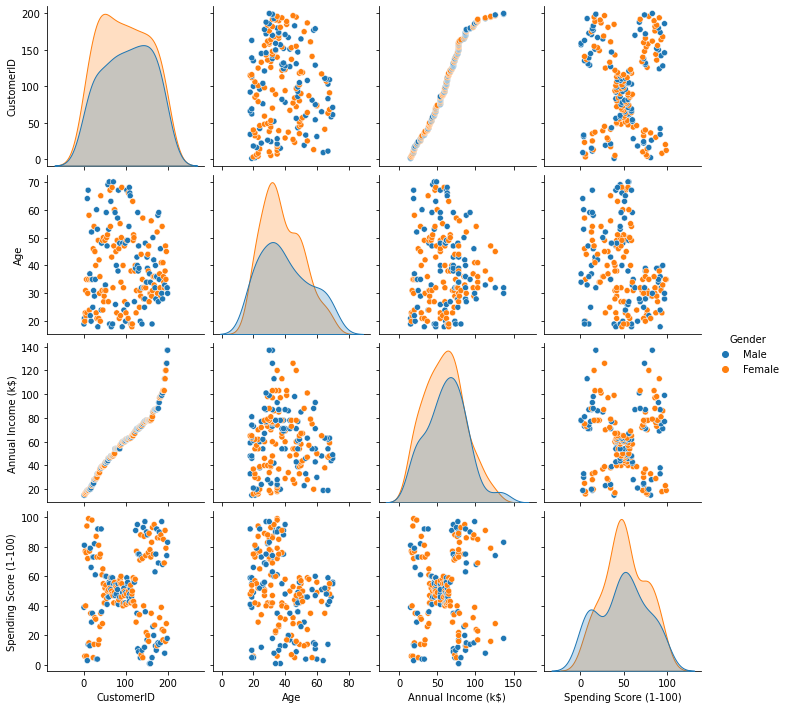

In [80]:
sns.pairplot(data, hue = "Gender")

## Arrumando os dados

In [81]:
import numpy as np

data.rename(columns={'Spending Score (1-100)' : 'Spending_Score'}, inplace=True)

dados_temp =  []
for row in data.itertuples():
  aux = [row.Age, row.Spending_Score]
  dados_temp.append(aux)

data = np.array(dados_temp)



## Elbow Method

In [82]:
from sklearn.cluster import KMeans

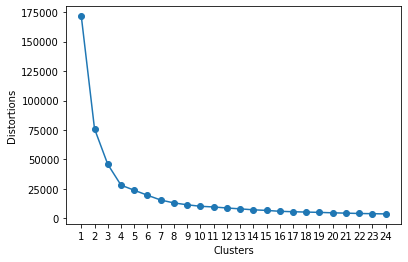

In [86]:
distortions = []

for qtd in range(1, 25):
    modelo = KMeans(n_clusters=qtd)
    modelo.fit(data)

    metrica = modelo.inertia_
    distortions.append(modelo.inertia_)

plt.plot(range(1, 25), distortions, marker='o')
plt.xlabel("Clusters")
plt.ylabel("Distortions")
plt.xticks(range(1, 25))
plt.show()

Baseado no grafico escolhi 17 como a quantidade de grupos

In [93]:
modelo = KMeans(n_clusters=17)
modelo.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Predição




In [94]:
resposta = modelo.predict(data)

## Vizualização

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

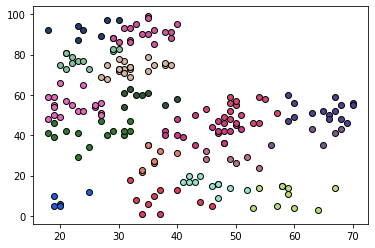

In [96]:
for i in range(17):
  grupo_i = data[resposta == i]
  plt.scatter(grupo_i[:,0], grupo_i[:,1], c=np.random.rand(3), edgecolor="black")

## Metricas de Avaliação

In [97]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score
sh = silhouette_score(data, modelo.labels_)
ch = calinski_harabasz_score(data,modelo.labels_)

In [98]:
print ("SH", sh)
print ("CH", ch)

SH 0.3828073794000153
CH 321.6289526958499
